In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
from math import sqrt
import seaborn as sns

In [2]:
G=nx.read_graphml('london.graph')


In [3]:
nx.is_directed(G)

False

In [4]:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [5]:
nx.info(G)

'Graph with 401 nodes and 467 edges'

In [6]:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

In [7]:
list(G.edges(data='length'))[1]

('Wembley Park', 'Neasden', 2353.1659381957816)

In [8]:
# degree_centrality
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')

In [9]:
df = pd.DataFrame(index=G.nodes())
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted_deg = df.sort_values(["degree"], ascending=False)
df_sorted_deg[0:10]

,degree
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [10]:
# betweenness_centrality
bet_london=nx.betweenness_centrality(G,normalized=False)
nx.set_node_attributes(G,bet_london,'betweenness')

In [11]:
df = pd.DataFrame(index=G.nodes())
df['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))
df_sorted_bet = df.sort_values(["betweenness"], ascending=False)
df_sorted_bet[0:10]

,betweenness
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


In [12]:
# eigenvector_centrality
# eig_london=nx.eigenvector_centrality_numpy(G)
# nx.set_node_attributes(G,eig_london,'eigenvector')
# df = pd.DataFrame(index=G.nodes())
# df['eigenvector'] = pd.Series(nx.get_node_attributes(G, 'eigenvector'))
# df_sorted = df.sort_values(["eigenvector"], ascending=False)
# df_sorted[0:10]

In [13]:
# closeness_centrality
clo_london=nx.closeness_centrality(G)
nx.set_node_attributes(G,clo_london,'closeness')
df = pd.DataFrame(index=G.nodes())
df['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))
df_sorted_clo = df.sort_values(["closeness"], ascending=False)
df_sorted_clo[0:10]

,closeness
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


In [14]:
clu_G = nx.average_clustering(G)

In [15]:
density_G=nx.density(G)
# robust=nx.number_connected_components(G)
comp_G=nx.number_connected_components(G)

In [16]:
avg_short=nx.average_shortest_path_length(G)
avg_short

13.545997506234414

In [17]:
G21=G.copy()
G22=G.copy()

In [18]:
G21=G.copy()
values_sorted = sorted(deg_london.items(), key=itemgetter(1), reverse=True)  
sorted_ten=[e for e,v in values_sorted[:10]]
avg_clu_1_deg=[clu_G]
# density_1_deg=[density_G]
comp_1_deg=[comp_G]
for station in sorted_ten:
    G21.remove_nodes_from([station])
    avg_clu_1_deg.append(nx.average_clustering(G21))
#     density_1_deg.append(nx.density(G21))
    comp_1_deg.append(nx.number_connected_components(G21))
    print('average_clustering:',
          nx.average_clustering(G21),'\ndensity:',nx.density(G21))


average_clustering: 0.030625000000000003 
density: 0.005739348370927318
average_clustering: 0.030027449576321755 
density: 0.0056674349189556805
average_clustering: 0.027051926298157458 
density: 0.005607381998151969
average_clustering: 0.027287993282955506 
density: 0.005546650382922423
average_clustering: 0.024410774410774414 
density: 0.00551080424498146
average_clustering: 0.02447257383966245 
density: 0.005474522906894558
average_clustering: 0.02343485617597293 
density: 0.005437801113393007
average_clustering: 0.021967769296013573 
density: 0.005387651243703588
average_clustering: 0.02372448979591837 
density: 0.005349966073385876
average_clustering: 0.02378516624040921 
density: 0.0053249393402846085


In [19]:
G21=G.copy()
values_sorted = sorted(bet_london.items(), key=itemgetter(1), reverse=True)  
sorted_ten=[e for e,v in values_sorted[:10]]
avg_clu_1_bet=[clu_G]
# density_1_bet=[density_G]
comp_1_bet=[comp_G]
for station in sorted_ten:
    G21.remove_nodes_from([station])
    avg_clu_1_bet.append(nx.average_clustering(G21))
#     density_1_bet.append(nx.density(G21))
    comp_1_bet.append(nx.number_connected_components(G21))
#     print('average_clustering:',
#           nx.average_clustering(G21),'\ndensity:',nx.density(G21))

In [20]:
# G21=G.copy()
# values_sorted = sorted(eig_london.items(), key=itemgetter(1), reverse=True)  
# sorted_ten=[e for e,v in values_sorted[:10]]
# avg_clu_1_eig=[clu_G]
# density_1_eig=[density_G]
# for station in sorted_ten:
#     G21.remove_nodes_from([station])
#     avg_clu_1_eig.append(nx.average_clustering(G21))
#     density_1_eig.append(nx.density(G21))
#     print(station)
#     print('average_clustering:',
#           nx.average_clustering(G21),'\ndensity:',nx.density(G21))

In [21]:
G21=G.copy()
values_sorted = sorted(clo_london.items(), key=itemgetter(1), reverse=True)  
sorted_ten=[e for e,v in values_sorted[:10]]
avg_clu_1_clo=[clu_G]
# density_1_clo=[density_G]
comp_1_clo=[comp_G]
for station in sorted_ten:
    G21.remove_nodes_from([station])
    avg_clu_1_clo.append(nx.average_clustering(G21))
#     density_1_clo.append(nx.density(G21))
    comp_1_clo.append(nx.number_connected_components(G21))

In [22]:
G22=G.copy()
avg_clu_2_clo=[clu_G]
# density_2_clo=[density_G]
comp_2_clo=[comp_G]
for m in range(10):
#     update degree every loop
    nx.set_node_attributes(G22,dict(nx.closeness_centrality(G22)),'closeness') 
    closeness_val=[(i[1]['closeness']) for i in G22.nodes(data=True)]
    maxclo=[n for n in G22.nodes() if G22.nodes[n]['closeness'] == max(closeness_val)]
#     print(maxclo[0])
    G22.remove_nodes_from([maxclo[0]])
    avg_clu_2_clo.append(nx.average_clustering(G22))
#     density_2_clo.append(nx.density(G22))
    comp_2_clo.append(nx.number_connected_components(G22))

In [23]:
G22=G.copy()
avg_clu_2_deg=[clu_G]
# density_2_deg=[density_G]
comp_2_deg=[comp_G]
for m in range(10):
#     update degree every loop
    nx.set_node_attributes(G22,dict(nx.degree_centrality(G22)),'degree') 
    degree_val=[(i[1]['degree']) for i in G22.nodes(data=True)]
    maxdeg=[n for n in G22.nodes() if G22.nodes[n]['degree'] == max(degree_val)]
    print(maxdeg[0])
    G22.remove_nodes_from([maxdeg[0]])
    avg_clu_2_deg.append(nx.average_clustering(G22))
#     density_2_deg.append(nx.density(G22))
    comp_2_deg.append(nx.number_connected_components(G22))

Stratford
Bank and Monument
Baker Street
King's Cross St. Pancras
Canning Town
Green Park
Earl's Court
Waterloo
Oxford Circus
Willesden Junction


In [24]:
G22=G.copy()
avg_clu_2_bet=[clu_G]
# density_2_bet=[density_G]
comp_2_bet=[comp_G]
bet=[]
for m in range(10):
#     update every loop
    nx.set_node_attributes(G22,dict(nx.betweenness_centrality(G22,normalized=False)),'betweenness') 
    betweenness_val=[(i[1]['betweenness']) for i in G22.nodes(data=True)]
    
    maxbet=[n for n in G22.nodes() if G22.nodes[n]['betweenness'] == max(betweenness_val)]
    bet.append(max(betweenness_val))
#     print(maxbet[0])
    G22.remove_nodes_from([maxbet[0]])
    avg_clu_2_bet.append(nx.average_clustering(G22))
#     density_2_bet.append(nx.density(G22))
    comp_2_bet.append(nx.number_connected_components(G22))

In [25]:
# G22=G.copy()
# avg_clu_2_eig=[clu_G]
# density_2_eig=[density_G]
# for m in range(10):
# #     update every loop
#     nx.set_node_attributes(G22,dict(nx.eigenvector_centrality_numpy(G22)),'eigenvector') 
#     eigenvector_val=[(i[1]['eigenvector']) for i in G22.nodes(data=True)]
#     maxeig=[n for n in G22.nodes() if G22.nodes[n]['eigenvector'] == max(eigenvector_val)]
#     print(maxeig[0])
#     G22.remove_nodes_from([maxeig[0]])
#     avg_clu_2_eig.append(nx.average_clustering(G22))
#     density_2_eig.append(nx.density(G22))


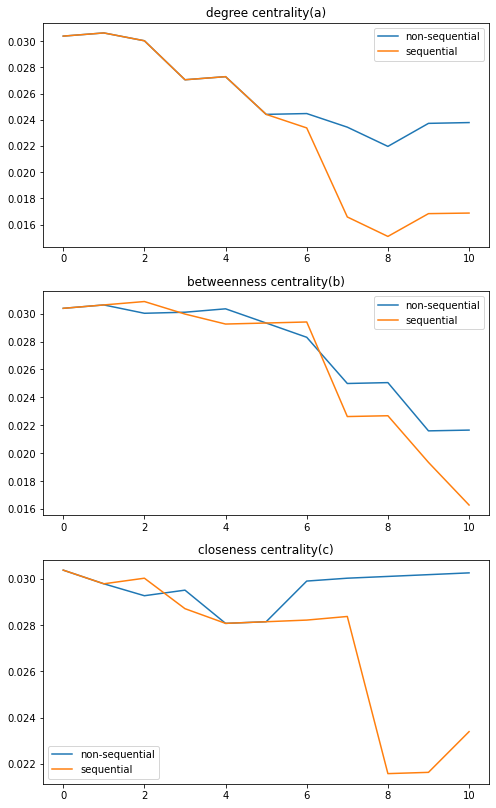

In [119]:
plt.figure(figsize=(8, 14))
plt.subplot(3,1,1)
plt.title('degree centrality(a)')
plt.plot(avg_clu_1_deg,label='non-sequential')
plt.plot(avg_clu_2_deg,label='sequential')
plt.legend()
plt.subplot(3,1,2)
plt.title('betweenness centrality(b)')
plt.plot(avg_clu_1_bet,label='non-sequential')
plt.plot(avg_clu_2_bet,label='sequential')
plt.legend()
plt.subplot(3,1,3)
plt.title('closeness centrality(c)')
plt.plot(avg_clu_1_clo,label='non-sequential')
plt.plot(avg_clu_2_clo,label='sequential')
plt.legend()
plt.savefig('avg_clu.png')

In [28]:
df_sorted_bet['betweenness'].values[0:10].tolist()

[23768.09343434341,
 23181.05894660899,
 21610.387049062047,
 20373.521464646434,
 19464.882323232327,
 17223.622113997128,
 16624.275468975477,
 16226.155916305914,
 15287.107611832655,
 13173.758008657984]

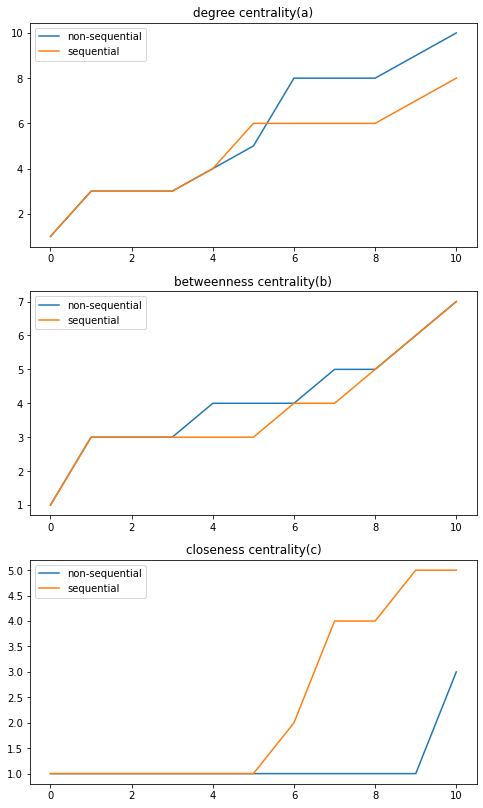

In [120]:
  plt.figure(figsize=(8, 14))
plt.subplot(3,1,1)
plt.title('degree centrality(a)')
plt.plot(comp_1_deg,label='non-sequential')
plt.plot(comp_2_deg,label='sequential')
plt.legend()
plt.subplot(3,1,2)
plt.title('betweenness centrality(b)')
plt.plot(comp_1_bet,label='non-sequential')
plt.plot(comp_2_bet,label='sequential')
plt.legend()
plt.subplot(3,1,3)
plt.title('closeness centrality(c)')
plt.plot(comp_1_clo,label='non-sequential')
plt.plot(comp_2_clo,label='sequential')
plt.legend()
plt.savefig('comp.png')

In [30]:
# II.1.
G3=G.copy()
v_flows={(e1, e2):round(1./(flows+0.1),7) for e1, e2, flows in G3.edges(data='flows')}
# Let us add the inverted weight as an attribute to the edges in the graph
nx.set_edge_attributes(G3, v_flows, 'v_flows')

In [31]:
bet_london=nx.betweenness_centrality(G3,normalized=False,weight='v_flows')
nx.set_node_attributes(G3,bet_london,'betweenness_w')

In [32]:
df = pd.DataFrame(index=G3.nodes())
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G3, 'betweenness_w'))
df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,betweenness_w
Green Park,45690.0
Bank and Monument,40322.0
Waterloo,33231.0
Westminster,30433.0
Liverpool Street,26878.0
Stratford,26437.0
Bond Street,23288.0
Euston,22682.0
Oxford Circus,21607.0
Warren Street,20292.0


In [33]:
def avg_flow(G):
#   new gloabal measure: the average passenger flow of each station
    n=nx.number_of_nodes(G)
    m=nx.number_of_edges(G)
    df = pd.DataFrame(index=G.edges())
    df['flows'] = pd.Series(nx.get_edge_attributes(G, 'flows'))
    sum1=df.flows.sum()
    d= sum1/n
    return d


In [36]:
avg_clu_w_G=nx.average_clustering(G,weight='flows')
avg_flow_G=avg_flow(G)
print(avg_clu_w_G,avg_flow_G)

0.0015791877116043108 24765.204488778054


In [37]:
G3=G.copy()
G3.remove_nodes_from(['Stratford'])
avg_clu_w_G3=nx.average_clustering(G3,weight='flows')
avg_flow_G3=avg_flow(G3)
print(avg_clu_w_G3,avg_flow_G3)

0.0016156156374706456 23915.715


In [38]:
G3=G.copy()
G3.remove_nodes_from(['Green Park'])
avg_clu_w_G3=nx.average_clustering(G3,weight='flows')
avg_flow_G3=avg_flow(G3)
print(avg_clu_w_G3,avg_flow_G3)

0.0013181475470089986 23255.5125


## PART 2  
III.2.

In [39]:
#set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [40]:
data = pd.read_csv("london_flows.csv")
data

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [41]:
data=data.drop(index=data[data['distance']==0].index)
data=data.drop(index=data[data['flows']==0].index)
data=data.drop(index=data[data['jobs']==0].index)
data=data.drop(index=data[data['population']==0].index)

In [42]:
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    data[f"log_{x}"] = np.log(data[x])
    log_x_vars.append(f"log_{x}")


In [43]:
data.describe()

,flows,population,jobs,distance,log_population,log_jobs,log_distance
count,43945.000000,43945.000000,43945.000000,43945.000000,43945.000000,43945.000000,43945.000000
mean,35.095756,6197.610172,7748.471180,14646.100676,8.137378,8.088718,9.366613
std,154.299058,9341.954753,12186.761612,8776.994507,1.022764,1.343147,0.751299
min,1.000000,162.000000,42.000000,248.178706,5.087596,3.737670,5.514149
25%,2.000000,1741.000000,1219.000000,7831.583369,7.462215,7.105786,8.965920
50%,6.000000,3046.000000,3168.000000,13409.114985,8.021585,8.060856,9.503690
75%,23.000000,6268.000000,7932.000000,20079.611248,8.743213,8.978660,9.907460
max,15946.000000,67372.000000,78549.000000,60633.323742,11.117985,11.271478,11.012600


In [44]:
#uncosim
formula = 'flows ~ log_population + log_jobs + log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=data, 
                  family=sm.families.Poisson()).fit()
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                43945
Model:                            GLM   Df Residuals:                    43941
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1675e+06
Date:                Mon, 02 May 2022   Deviance:                   2.1627e+06
Time:                        15:10:41   Pearson chi2:                 4.13e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0646      0.014   -223.

In [45]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
data["unconstrainedEst"] = np.exp(K + alpha*data["log_population"] + gamma*data["log_jobs"] - beta*data["log_distance"])

In [46]:
CalcRSqaured(data["flows"], data["unconstrainedEst"])

0.31141075618820413

In [47]:
CalcRMSE(data["flows"],data["unconstrainedEst"])

128.176

IV.1. Scenario A

In [48]:
#Production-constrained Model
formula = 'flows ~ station_origin + log_jobs + log_distance-1'

#run the regression
prodSim = smf.glm(formula = formula, 
                  data=data, 
                  family=sm.families.Poisson()).fit()


In [49]:
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
data = data.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
data.drop(columns = ["coef"], inplace = True)
#check this has worked

gamma = prodSim.params[-2]
beta = -prodSim.params[-1]
data.head()

/tmp/ipykernel_231/3190191214.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst,alpha_i
0,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.331852,3.270351
1,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,2.882125,3.270351
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,56.518643,3.270351
3,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,36.062256,3.270351
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,3.120065,3.270351


In [50]:
data["prodsimest1"] = np.exp(data["alpha_i"]+gamma*data["log_jobs"] - beta*data["log_distance"])

In [51]:
# Scenario A
def Scenario_A(row):
    if row["station_destination"] == "Canary Wharf":
        val = round(row['jobs']*0.5,0)
    else:
        val = row['jobs']
    return val
        
data["job_Scenario_A"] = data.apply(Scenario_A, axis =1)

In [52]:
job_gamma = data["jobs"]**gamma
dist_beta = data["distance"]**beta
#calcualte the first stage of the Ai values
data["Ai1"] = job_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(data.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
data = data.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [85]:
O_i = pd.DataFrame(data.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
data = data.merge(O_i, on = "station_origin", how = "left" )
D_j = pd.DataFrame(data.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
data = data.merge(D_j, on = "station_destination", how = "left" )
data["ScenarioA"] = data["A_i"]*data["O_i"]*job_gamma*dist_beta


KeyError: 'O_i'

In [54]:
data

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst,alpha_i,prodsimest1,job_Scenario_A,Ai1,A_i,O_i,D_j,ScenarioA
0,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1.331852,3.270351,1.406918,442.0,1.365344e+05,9.456490e-08,599,442,7.733907
1,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,2.882125,3.270351,3.677350,665.0,9.485046e+04,9.456490e-08,599,665,5.372745
2,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,56.518643,3.270351,76.062924,29386.0,3.189570e+06,9.456490e-08,599,58772,180.671211
3,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,36.062256,3.270351,56.123931,15428.0,6.130599e+05,9.456490e-08,599,15428,34.726392
4,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,3.120065,3.270351,3.568414,1208.0,2.337144e+05,9.456490e-08,599,1208,13.238605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43940,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,25.463983,6.701868,131.612217,3342.0,8.660342e+05,2.957584e-08,7892,3342,202.143241
43941,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,46.695352,6.701868,268.799374,5487.0,8.746933e+05,2.957584e-08,7892,5487,204.164386
43942,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7.002274,6.701868,36.861579,400.0,1.392843e+05,2.957584e-08,7892,400,32.510702
43943,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,17.381639,6.701868,106.060284,893.0,1.564146e+05,2.957584e-08,7892,893,36.509138


In [87]:
print('sum of estimate flow:',round(data["ScenarioA"].sum(),0),'\nsum of real flow',data["flows"].sum())

sum of estimate flow: 1542252.0 
sum of real flow 1542283


In [86]:
data["ScenarioA"]=round(data["ScenarioA"],0)

IV.2. Scenario B

In [56]:
#doubSim
dbl_form = 'flows ~ station_destination + station_origin + log_distance - 1'
#run a doubly constrained sim
doubSim = smf.glm(formula = dbl_form, data=data, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
# print(doubSim.summary())

In [57]:
data["doubsimfitted"] = np.round(doubSim.mu)

In [58]:
CalcRSqaured(data["flows"], data["doubsimfitted"])

0.41893772760573345

In [59]:
CalcRMSE(data["flows"],data["doubsimfitted"])

117.622

In [60]:
dbl_form = 'flows ~ station_destination + station_origin + distance - 1'
#run a doubly constrained sim
doubSim_exp = smf.glm(formula = dbl_form, data=data, family=sm.families.Poisson()).fit()

In [61]:
data["doubsimfitted_exp"] = np.round(doubSim_exp.mu)

In [62]:
CalcRSqaured(data["flows"], data["doubsimfitted_exp"])

0.499777869853813

In [63]:
CalcRMSE(data["flows"],data["doubsimfitted_exp"])

109.598

In [64]:
data['distance1']=data['distance']/2
data['distance2']=data['distance']/data['jobs']

In [65]:
dbl_form = 'flows ~ station_destination + station_origin + distance1  - 1'
#run a doubly constrained sim
doubSim_exp1 = smf.glm(formula = dbl_form, data=data, family=sm.families.Poisson()).fit()

In [66]:
dbl_form = 'flows ~ station_destination + station_origin + distance2  - 1'
#run a doubly constrained sim
doubSim_exp2 = smf.glm(formula = dbl_form, data=data, family=sm.families.Poisson()).fit()

In [68]:
data["ScenarioB1"] = doubSim_exp1.mu

In [82]:
data["ScenarioB2"] = doubSim_exp2.mu

In [70]:
beta_exp=-doubSim_exp.params[-1]
beta_exp

0.00014481467725080413

In [71]:
beta_exp1=-doubSim_exp1.params[-1]
beta_exp1

0.0002896293545002679

In [72]:
beta_exp2=-doubSim_exp2.params[-1]
beta_exp2

0.1277421267286606

In [73]:
data["ScenarioB1"].sum()

1542282.9999888188

In [74]:
data["ScenarioB2"].sum()

1542282.9999999746

In [89]:
data["ScenarioB1"]=round(data["ScenarioB1"],0)

In [90]:
data["ScenarioB2"]=round(data["ScenarioB2"],0)

In [78]:
CalcRSqaured(data["flows"], data["ScenarioB1"])

0.49981158150084015

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='flows', ylabel='Density'>

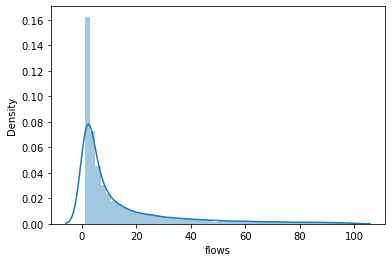

In [110]:
sns.distplot(data[data["flows"]<100]['flows']) 

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ScenarioB1', ylabel='Density'>

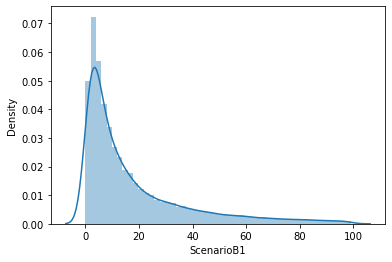

In [114]:
sns.distplot(data[data["ScenarioB1"]<100]['ScenarioB1']) 

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ScenarioB2', ylabel='Density'>

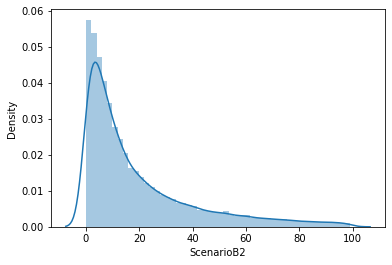

In [112]:
sns.distplot(data[data["ScenarioB2"]<100]['ScenarioB2']) 

/opt/conda/envs/sds2021/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ScenarioA', ylabel='Density'>

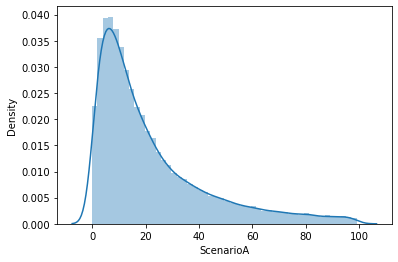

In [113]:
sns.distplot(data[data["ScenarioA"]<100]['ScenarioA']) 

In [108]:
data["flows"].describe()
# high_limit=55  #Q3+1.5*IQR

count    43945.000000
mean        35.095756
std        154.299058
min          1.000000
25%          2.000000
50%          6.000000
75%         23.000000
max      15946.000000
Name: flows, dtype: float64

In [99]:
data["ScenarioA"].describe()
# high_limit=76

count    43945.000000
mean        35.095051
std         73.791184
min          0.000000
25%          7.000000
50%         16.000000
75%         36.000000
max       2953.000000
Name: ScenarioA, dtype: float64

In [93]:
data["ScenarioB1"].describe()
# high_limit=78

count    43945.000000
mean        35.095301
std         98.957292
min          0.000000
25%          4.000000
50%         11.000000
75%         30.000000
max       4343.000000
Name: ScenarioB1, dtype: float64

In [98]:
data["ScenarioB2"].describe()
# high_limit=69

count    43945.000000
mean        35.091296
std         84.739529
min          0.000000
25%          5.000000
50%         12.000000
75%         34.000000
max       3128.000000
Name: ScenarioB2, dtype: float64

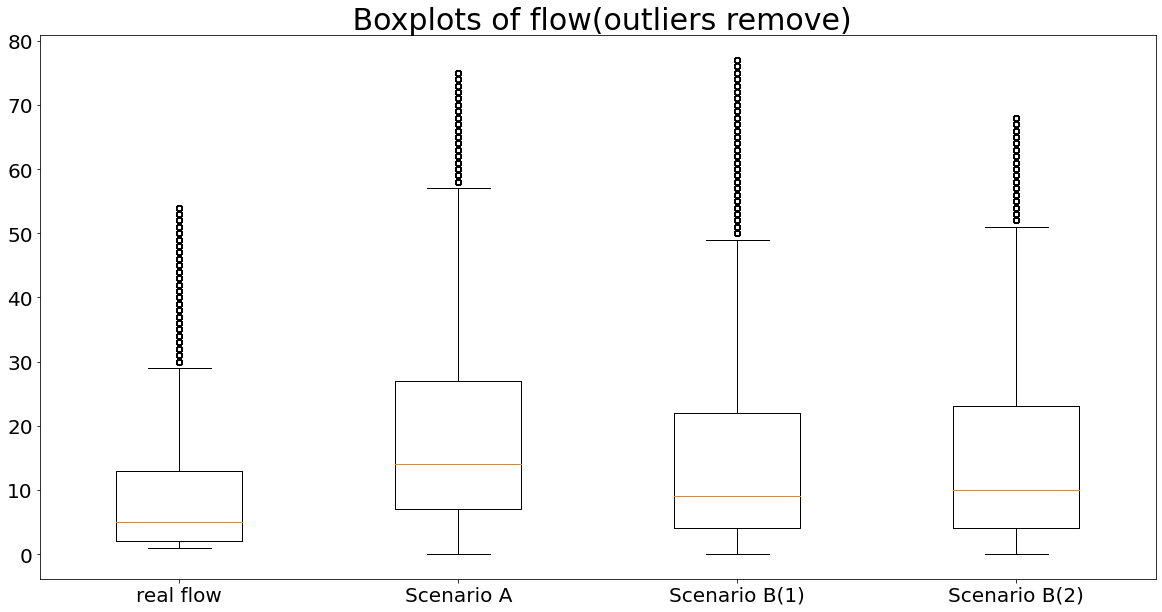

In [115]:
plt.figure(figsize=(20,10))
labels=['real flow','Scenario A','Scenario B(1)','Scenario B(2)']
m='cases'
plt.boxplot([data[data["flows"]<55]["flows"],data[data["ScenarioA"]<76]["ScenarioA"],data[data["ScenarioB1"]<78]["ScenarioB1"],data[data["ScenarioB2"]<69]["ScenarioB2"]],labels=labels)
plt.title(" Boxplots of flow(outliers remove)",fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('boxplotcase.png')
plt.show()

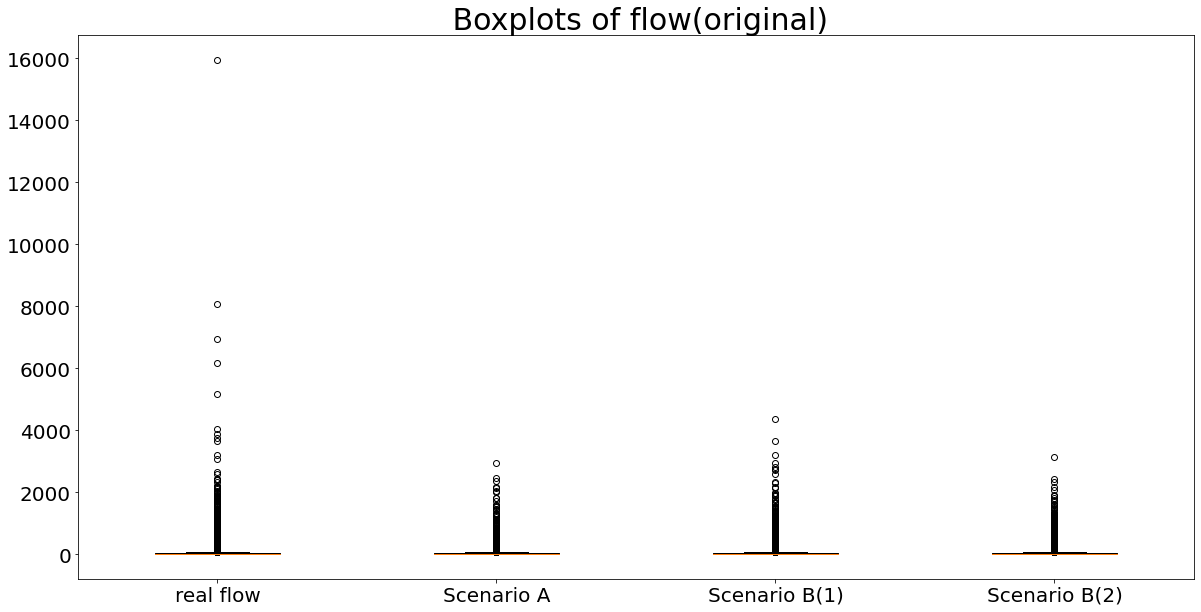

In [116]:
plt.figure(figsize=(20,10))
labels=['real flow','Scenario A','Scenario B(1)','Scenario B(2)']
m='cases'
plt.boxplot([data["flows"],data["ScenarioA"],data["ScenarioB1"],data["ScenarioB2"]],labels=labels)
plt.title(" Boxplots of flow(original)",fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('boxplotcase.png')
plt.show()

In [ ]:
data['SIM_est_pow_2'].sum()

In [ ]:
data["doubsimfitted"] = np.round(doubSim.mu)

In [ ]:
CalcRSqaured(data["flows"],data["doubsimfitted"]"])

In [ ]:
CalcRMSE(data["flows"],data["doubsimfitted"])